## Part 1: 

• Implement the Wright-Fisher model for an infinite population and asexual reproduction, you will need to use an ODE integration library, e.g. from scipy.integrate import odeint.

• Test it using the same parameters as in the slides (Lecture 18, Page 17).


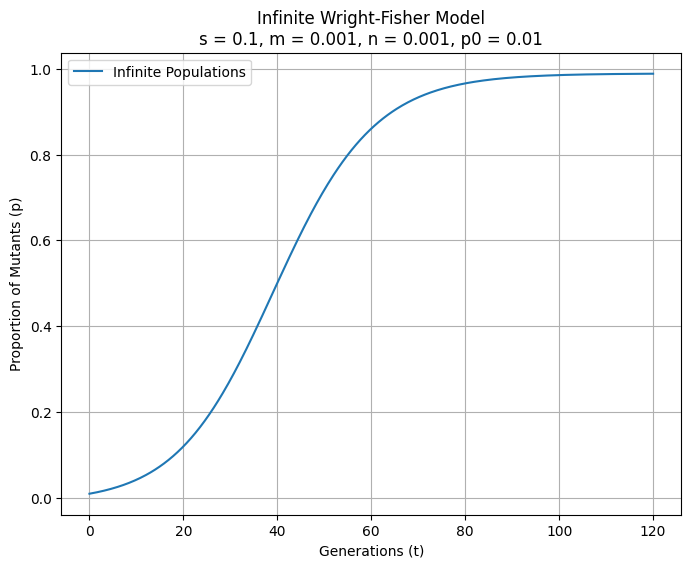

In [107]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

# Define the Wright-Fisher model:
def wright_fisher(p, t, s, m, n):
    dpdt =  ((s - n - m - n * s) * p + m - s * p**2) / (1 + s * p)
    return dpdt

# Parameters
s = 0.1   # Selective advantage
m = 0.001  # Mutation rate from normal to mutant
n = 0.001  # Mutation rate from mutant to normal
p0 = 0.01  # Initial proportion of mutants

# Time span 
t = np.linspace(0, 120, 500)

# Solve the ODE
p = odeint(wright_fisher, p0, t, args=(s, m, n))

# Plot the results
plt.figure(figsize = (8, 6))
plt.plot(t, p, label='Infinite Populations')
plt.xlabel('Generations (t)')
plt.ylabel('Proportion of Mutants (p)')
plt.title(f"Infinite Wright-Fisher Model\ns = {s}, m = {m}, n = {n}, p0 = {p0}")
plt.legend()
plt.grid()
plt.show()

• Now implement the Wright-Fisher model for a finite population using asexual reproduction.

• Run it a few times. what do you notice?
Since the Wright-Fisher Model for finite populations is stochastic, we expect different runs to produce different trajectories.
Based on the plots generated, here are a few key observations: 
+ In some runs, the proportion of mutants (p(t)) quickly drops to zero (mutants go extinct). 
+ In other runs, mutants eventually reach **fixation** (100% of the population). 
+ This highlights the randomness of genetic drift in finite populations. 
+ The randomness in the model comes from the binomial distribution, which models random sampling of the next generation of mutants and introduces stochasticity. 
+ Before reaching fixation (100%) or extinction (0%), the proportion of mutants fluctuates randomly due to selection pressure (s), mutation effects (m and n) and binomial sampling noise (xnew).


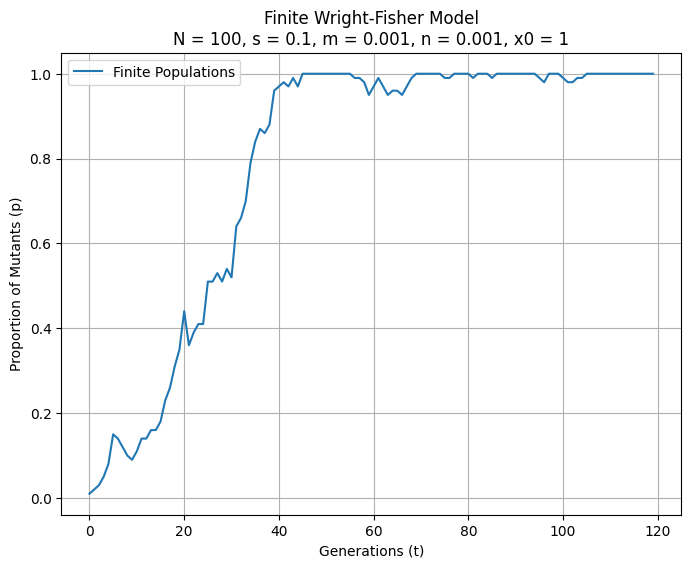

In [108]:
import numpy as np 
import matplotlib.pyplot as plt

# Parameters
N = 100     # Population size
s = 0.1     # Selection coefficient
m = 0.001   # Mutation rate from normal to mutant
n = 0.001   # Mutation rate from mutant to normal
x0 = 1      # Initial number of mutants

# Time steps 
T = 120

# Initialize mutant count and time
x_values = np.zeros(T)
x_values[0] = x0

# Wright-Fisher simulation for a finite population
for t in range(1, T):
    x = x_values[t-1]

    # Selection step
    p_prime = (1 + s) * x / (N + s * x)

    # Mutation step
    p_double_prime = (1  - n) * p_prime + m * (1 - p_prime)

    # Sampling step
    x_values[t] = np.random.binomial(N, p_double_prime)

# Normalize x_values to proportions
p_values = x_values / N

# Plot the results
plt.figure(figsize = (8, 6))
plt.plot(range(T), p_values, label='Finite Populations')
plt.xlabel('Generations (t)')
plt.ylabel('Proportion of Mutants (p)')
plt.title(f"Finite Wright-Fisher Model\nN = {N}, s = {s}, m = {m}, n = {n}, x0 = {x0}")
plt.legend()
plt.grid()
plt.show()


• Write a function to run the Wright-Fisher model multiple times and average the results.

• Plot a graph after averaging over a number of runs.

• Does averaging over more runs for the finite model make it get closer to the infinite model?
+ When we run the finite model once, the trajectory is noisy because of the stochasticity of the model. By averaging over more runs, the mean trajectory smooths out, reducing the random nature of the model. 
+ The shaded region, which represents the standard deviation shrinks with more runs, (Tested 50 -> 300 runs), bringing the finite model closer to the infinite model, which follows a deterministic ODE. 
+ Even after many runs, the finite model includes sampling variability due to the formula it follows. 
+ The infinite model assumes no random drift, while in the finite model, genetic drift still exists on average. 

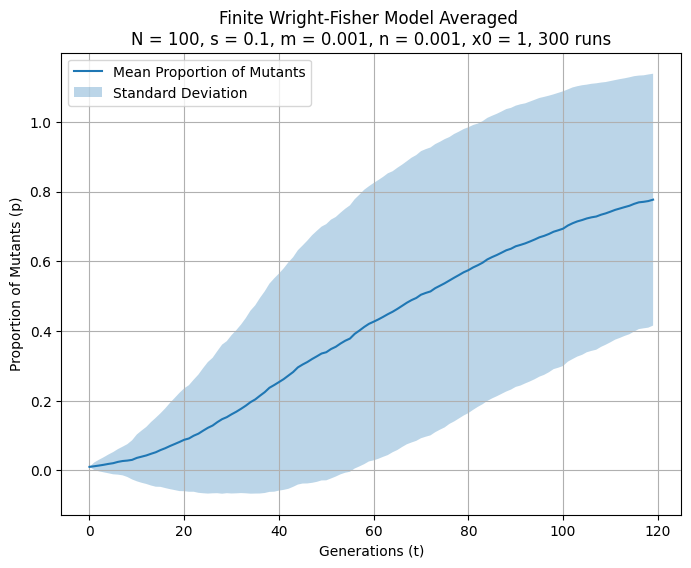

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def wright_fisher_finite(N, s, m, n, x0, gens, num_runs):
    # Store results for each run
    all_runs = np.zeros((num_runs, gens))

    for run in range(num_runs):
        # Initialize mutant count and time for this run
        x = x0
        x_values = np.zeros(gens)
        x_values[0] = x 

        for t in range(1, gens):
            # Selection step
            p_prime = (1 + s) * x / (N + s * x)

            # Mutation step
            p_double_prime = (1 - n) * p_prime + m * (1 - p_prime)

            # Sampling step
            x = np.random.binomial(N, p_double_prime)
            x_values[t] = x

        # Normalize x_values to proportions
        all_runs[run] = x_values / N

    # Compute mean and standard deviation across runs
    mean_values = np.mean(all_runs, axis=0)
    std_values = np.std(all_runs, axis=0)

    return mean_values, std_values

# Parameters
N = 100         # Population size
s = 0.1         # Selection coefficient
m = 0.001       # Mutation rate (normal → mutant)
n = 0.001       # Mutation rate (mutant → normal)
x0 = 1          # Initial number of mutants
generations = 120  # Number of generations
num_runs = 300     # Number of simulations to average

# Run the Wright-Fisher model for finite populations
mean_values, std_values = wright_fisher_finite(N, s, m, n, x0, generations, num_runs)

# Plot the averaged trajectory
plt.figure(figsize=(8, 6))
plt.plot(range(generations), mean_values, label='Mean Proportion of Mutants')
plt.fill_between(range(generations), mean_values - std_values, mean_values + std_values, alpha=0.3, label='Standard Deviation')
plt.xlabel('Generations (t)')
plt.ylabel('Proportion of Mutants (p)')
plt.title(f"Finite Wright-Fisher Model Averaged \nN = {N}, s = {s}, m = {m}, n = {n}, x0 = {x0}, {num_runs} runs")
plt.legend()
plt.grid()
plt.show()


• Now adjust your Wright-Fisher multiple runs model to return the take over time, i.e. when x/N > 0.95, and the proportion of mutants px = x N, averaged over a given number of runs.

– Plot graphs of how the take-over time depends on the selection strength s (assume N = 10000 and n = m = 0.0001)

– Plot graphs of how the take-over time depends on the mutation rate n, m (assuming N = 10000 and s = 0.01)

– Plot graphs of how the take-over time depends depends on the population size N (assuming s = 0.01 and n = m = 0.0001)


• Comment on what conditions are necessary for the mutant to take over the population.
1. Take-Over Time vs. Selection Stength (s)
+ Take-over decreases as selection advantage s increases. 
+ This happens because a higher s means mutants have a stronger advantage, increasing their reproductive success. 
+ Key Insight: Stronger selection leads to faster fixation (100%) of the mutant population. 

2. Take-Over Time vs. Mutation Rate (m, n)
+ Take-over time decreases initially for small m, n then increases at higher values. 
+ This happens because at very low mutation rates, mutants appear very slowly so the take-over time is delayed. 
+ At around m = n = 0.00002, the take-over skyrockets. 
+ Key Insight: A moderate mutation rate is best for quick take-over. 

3. Take-Over Time vs. Population Size (N)
+ Take-over time increases as the population size increases. 
+ The variance in the proportion of mutants (p) due to random sampling in a finite population is given by this formula: 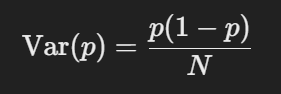
+ This means that when the population size N is smaller, there is larger variance and therefore more fluctuations and faster fixation or extinction. When the population size N is larger, there is smaller variance so drift weakens. 
+ This explains why take-over time is short when N is small and at high N, take-over takes longer. 


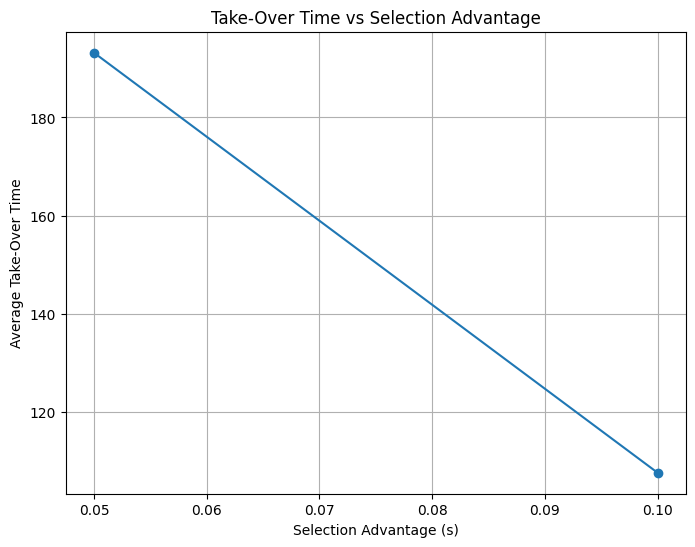

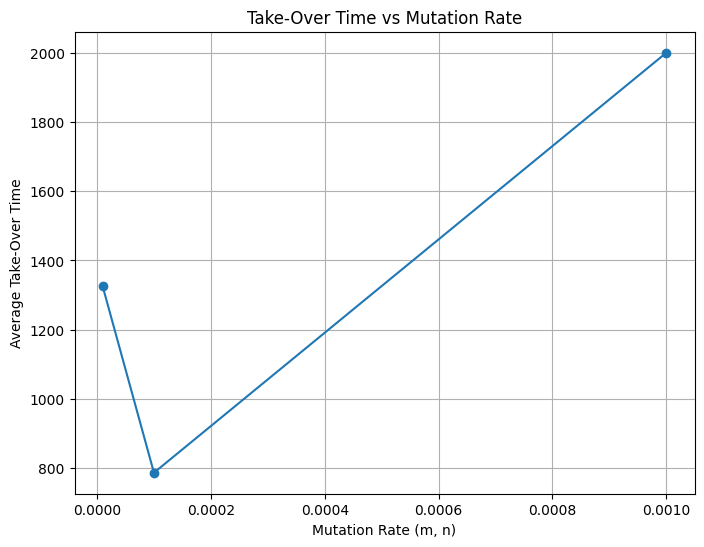

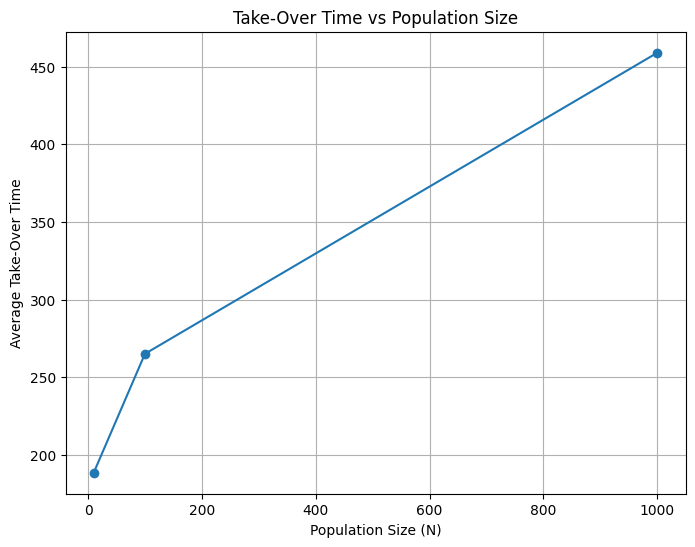

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def wright_fisher_takeover(N, s, m, n, x0, gens, num_runs):

    takeover_T = []
    all_runs = np.zeros((num_runs, gens))

    for run in range(num_runs):
        # Start with initial mutant count
        x = x0
        x_values = np.zeros(gens)
        x_values[0] = x

        for t in range (1, gens): 
            # Selection step
            p_prime = (1 + s) * x / (N + s * x)

            # Mutation step
            p_double_prime = (1 - n) * p_prime + m * (1 - p_prime)

            # Sampling step
            x = np.random.binomial(N, p_double_prime)
            x_values[t] = x

            # Store time of takeover
            if x / N > 0.95:
                takeover_T.append(t)
                break 

        # Store the trajectory
        all_runs[run, :] = x_values / N

    # Compute mean proportion of mutants and average takeover time
    mean_values = np.mean(all_runs, axis=0)
    avg_takeover_T = np.mean(takeover_T) if takeover_T else None 

    return mean_values, avg_takeover_T

# Take-Over time vs Selection Advantage (s)
selection_advantages = [0.001, 0.01, 0.05, 0.1]
takeover_times = []

for s in selection_advantages:
    mean_values, avg_takeover_T = wright_fisher_takeover(N = 10000, s = s, m =0.0001, n = 0.0001, x0 = 1, gens = 500, num_runs = 50)
    takeover_times.append(avg_takeover_T)

# Plot Take-Over time vs Selection Advantage
plt.figure(figsize=(8, 6))
plt.plot(selection_advantages, takeover_times, marker='o')
plt.xlabel('Selection Advantage (s)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs Selection Advantage')
plt.grid()
plt.show()

# Mutation Rate (m, n) vs Take-Over Time
mutation_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
takeover_times = []

for m_n in mutation_rates:
    mean_values, avg_takeover_T = wright_fisher_takeover(N=10000, s=0.01, m=m_n, n=m_n, x0=1, gens=5000, num_runs=50)
    takeover_times.append(avg_takeover_T)

# Plot Take-Over time vs Mutation Rate
plt.figure(figsize=(8, 6))
plt.plot(mutation_rates, takeover_times, marker='o')
plt.xlabel('Mutation Rate (m, n)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs Mutation Rate')
plt.grid()
plt.show()

# Population Size (N) vs Take-Over Time
population_sizes = [10, 100, 1000, 10000]
takeover_times = []

for N in population_sizes:
    mean_values, avg_takeover_T = wright_fisher_takeover(N = N, s = 0.01, m = 0.0001, n = 0.0001, x0 = 1, gens = 500, num_runs = 50)
    takeover_times.append(avg_takeover_T)

# Plot Take-Over time vs Population Size
plt.figure(figsize=(8, 6))
plt.plot(population_sizes, takeover_times, marker='o')
plt.xlabel('Population Size (N)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs Population Size')
plt.grid()
plt.show()


## Part 2: 

• Write a program to compute the transition matrix W for the Markov model

• Check that all the columns sum to 1

In [111]:
import numpy as np 
import scipy.special 

def compute_transition_matrix(N, s , m , n):
    # Use the transition function formula from the lecture slides

    W = np.zeros((N+1, N+1))

    for x in range(N+1):
        # Compute p_sm
        p_sm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)

        # Compute W (x, x')
        for x_prime in range(N+1):
            # Next generation number of mutants
            W[x_prime, x] = scipy.special.binom(N, x_prime) * p_sm**x_prime * (1 - p_sm)**(N - x_prime)

    return W

# Parameters
N = 10   # Population size
s = 0.01  # Selection coefficient
m = 0.0001  # Mutation rate (normal → mutant)
n = 0.0001  # Mutation rate (mutant → normal)

# Compute the transition matrix
W = compute_transition_matrix(N, s, m, n)

# Check that all the columns sum to 1
columns = np.sum(W, axis=0)
print ("Columns sum to 1: ",  columns)

# Check that all columns sum to 1 
if np.allclose(columns, np.ones(N+1)):
    print("Transition matrix is valid")
else:
    print("Transition matrix is invalid")

Columns sum to 1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Transition matrix is valid


• Write a program to generate the Markov distribution for each time step.

• Calculate the average of this distribution for each time step.

• Plot this for N = 1000, s = 0.01, n = m = 0.001 after T = 1000 steps

• Compare with the plot in the notes to check you have implemented this correctly (**Which notes**)

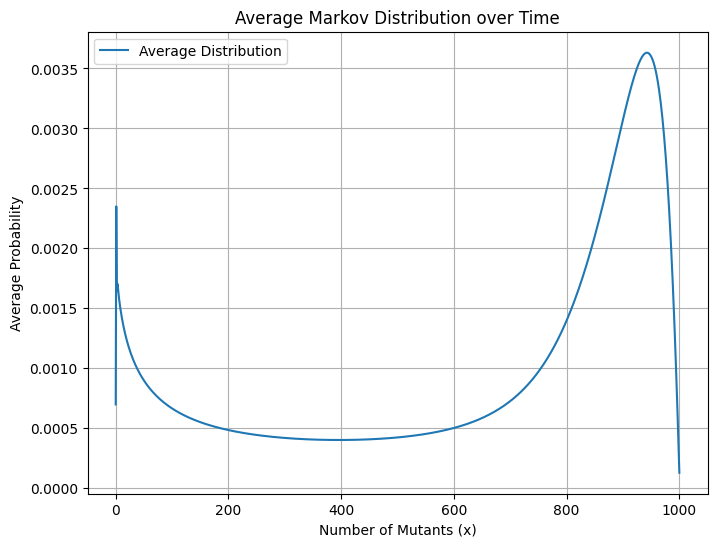

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def markov_dist(W, initial_state, time_steps):
    # Initialize the population size based on the transition matrix
    N = W.shape[0] - 1
    # Store distributions at each step
    distributions = np.zeros((time_steps, N + 1))
    # Initial state p(0):
    p_t = np.zeros(N + 1)
    p_t[initial_state] = 1

    # Simulate Markov process
    for t in range(time_steps):
        distributions[t] = p_t
        p_t = np.dot(W, p_t)

    # Compute the average probability distribution over time 
    avg_distribution = np.mean(distributions, axis=0)

    return distributions, avg_distribution

# Parameters
N = 1000       # Population size
s = 0.01     # Selection coefficient
m = 0.001  # Mutation rate (normal → mutant)
n = 0.001   # Mutation rate (mutant → normal)
x0 = 1       # Initial number of mutants
time_steps = 1000  # Number of generations to simulate

# Compute the transition matrix
W = compute_transition_matrix(N, s, m, n)

# Plot the average distribution over time
plt.figure(figsize=(8, 6))
plt.plot(range(N+1), markov_dist(W, x0, time_steps)[1], label='Average Distribution')
plt.xlabel('Number of Mutants (x)')
plt.ylabel('Average Probability')
plt.title('Average Markov Distribution over Time')
plt.legend()
plt.grid()
plt.show()


• Use your previous code to generate a histogram of the number of mutants after the same
number of time steps using the Wright-Fisher model, and plot it with the Markov distribution after differing numbers of time steps (e.g. 100, 500, 1000), using the density=True
option on plt.hist will help the scaling.


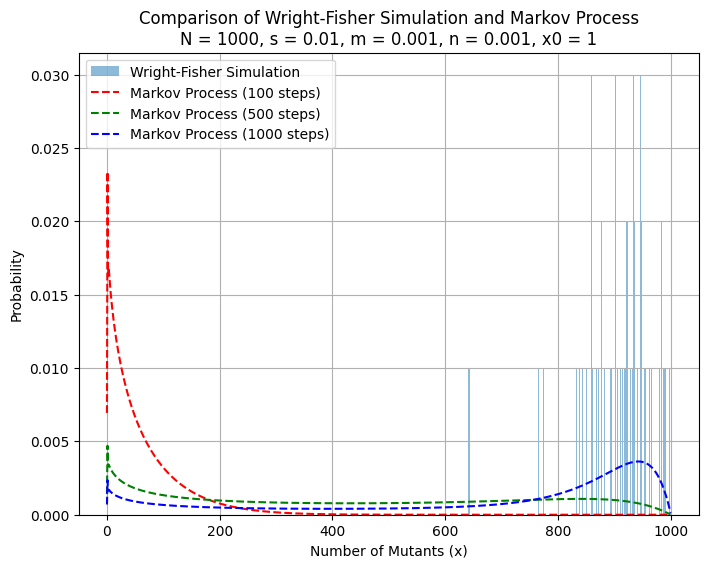

In [113]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special

def wright_fisher_sim(N, s, m , n , x0, gens, num_runs):
    # Store the final mutant counts at the last generation across all the runs
    final_mutants = []

    for run in range(num_runs):
        x = x0

        for t in range(gens):
            # Selection step
            p_prime = (1 + s) * x / (N + s * x)

            # Mutation step
            p_double_prime = (1 - n) * p_prime + m * (1 - p_prime)

            # Sampling step
            x = np.random.binomial(N, p_double_prime)

        
        final_mutants.append(x)

    return final_mutants

# Parameters
N = 1000       # Population size
s = 0.01       # Selection coefficient
m = 0.001      # Mutation rate (normal → mutant)
n = 0.001      # Mutation rate (mutant → normal)
x0 = 1         # Initial number of mutants
time_steps = 1000       # Number of time steps
num_runs = 100 # Number of Wright-Fisher simulations

# Compute the transition matrix
W = compute_transition_matrix(N, s, m, n)

# Run Markov process for 100, 500, 1000 time steps

_, markov100 = markov_dist(W, x0, 100)
_, markov500 = markov_dist(W, x0, 500)
_, markov1000 = markov_dist(W, x0, 1000)

# Get final number of mutants from the Wright-Fisher simulation
final_mutants = wright_fisher_sim(N, s, m, n, x0, time_steps, num_runs)

# Plot histogram of the final mutant counts (use density=True for normalized histogram)
plt.figure(figsize=(8, 6))
plt.hist(final_mutants, bins=range(N+1), density=True, alpha=0.5, label='Wright-Fisher Simulation')

# Overlay the Markov process distributions at different time steps
plt.plot(range(N+1), markov100, 'r--', label='Markov Process (100 steps)')
plt.plot(range(N+1), markov500, 'g--', label='Markov Process (500 steps)')
plt.plot(range(N+1), markov1000, 'b--', label='Markov Process (1000 steps)')

plt.xlabel('Number of Mutants (x)')
plt.ylabel('Probability')
plt.title(f"Comparison of Wright-Fisher Simulation and Markov Process\nN = {N}, s = {s}, m = {m}, n = {n}, x0 = {x0}")
plt.legend()
plt.grid()
plt.show()


## Part 3: 

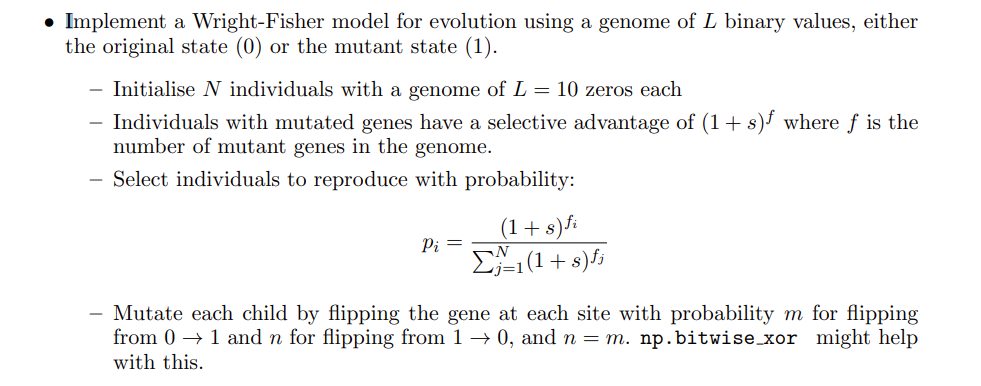

• Record for each time step the average number of mutations per site, on the genome, this
will give the spread of the mutated gene


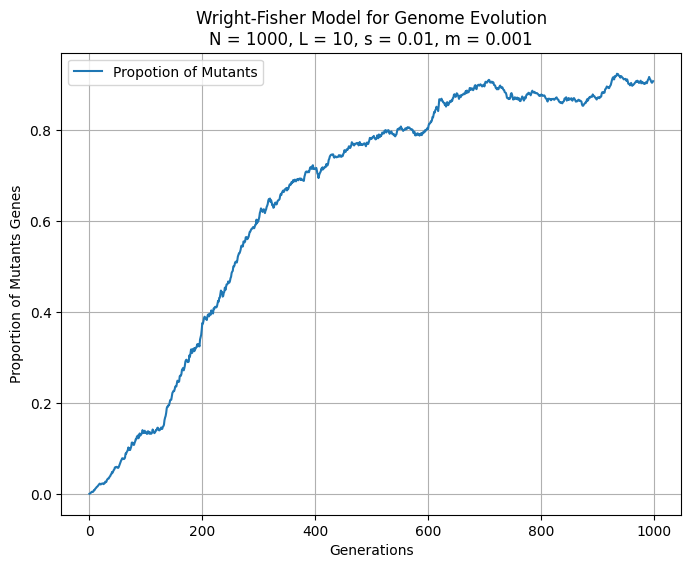

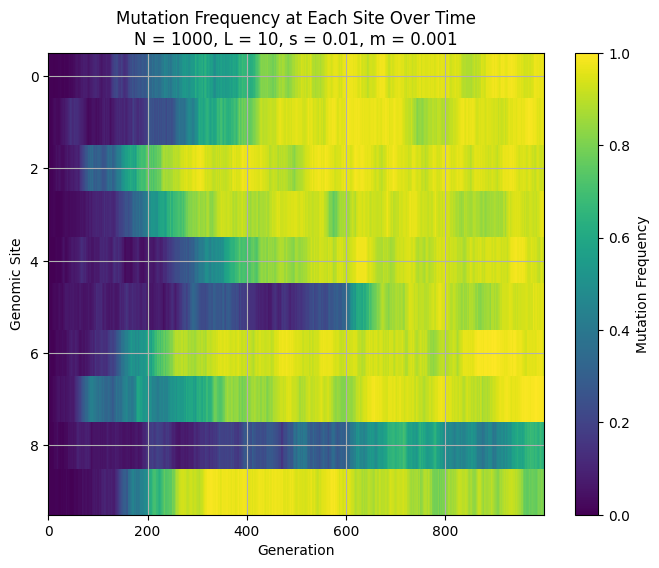

In [114]:
import numpy as np 
import matplotlib.pyplot as plt

def wrigh_fisher_evolution_genome(N, L, s, m, gens):
    # Initialize the population
    population = np.zeros((N, L), dtype=int)

    # Track mutant proportions over generations 
    mutant_props = np.zeros(gens)
    # Track mutation frequency per site 
    mutation_freq = np.zeros((gens, L))

    for gen in range(gens):
        # Compute the fitness of each individual
        f = np.sum(population, axis=1) 
        fitness = (1 + s) ** f
        # Normalize the fitness values
        selection_probs = fitness / np.sum(fitness)

        # Reproduce new population 
        parents = np.random.choice(N, size=N, p=selection_probs)
        new_population = population[parents].copy()

        # Apply mutations to the new population
        mutation_mask = np.random.rand(N, L) < m
        new_population = np.bitwise_xor(new_population, mutation_mask)

        # Update the population and compute the mutant proportion
        population = new_population
        mutant_props[gen] = np.sum(population) / (N * L)
        mutation_freq[gen] = np.mean(population, axis=0)

    return mutant_props, mutation_freq

# Parameters
N = 1000  # Population size
L = 10   # Genome length
s = 0.01  # Selection coefficient
m = 0.001 # Mutation rate
gens = 1000 # Number of generations

# Run the Wright-Fisher model for genome evolution
mutant_props, mutuation_freqs = wrigh_fisher_evolution_genome(N, L, s, m, gens)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mutant_props, label = 'Propotion of Mutants')
plt.xlabel('Generations')
plt.ylabel('Proportion of Mutants Genes')
plt.title(f"Wright-Fisher Model for Genome Evolution\nN = {N}, L = {L}, s = {s}, m = {m}")
plt.legend()
plt.grid()
plt.show()

# Plot the mutation frequency at each site over time
plt.figure(figsize=(8, 6))
plt.imshow(mutuation_freqs.T, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Mutation Frequency')
plt.xlabel('Generation')
plt.ylabel('Genomic Site')
plt.title(f"Mutation Frequency at Each Site Over Time\nN = {N}, L = {L}, s = {s}, m = {m}")
plt.grid()
plt.show()





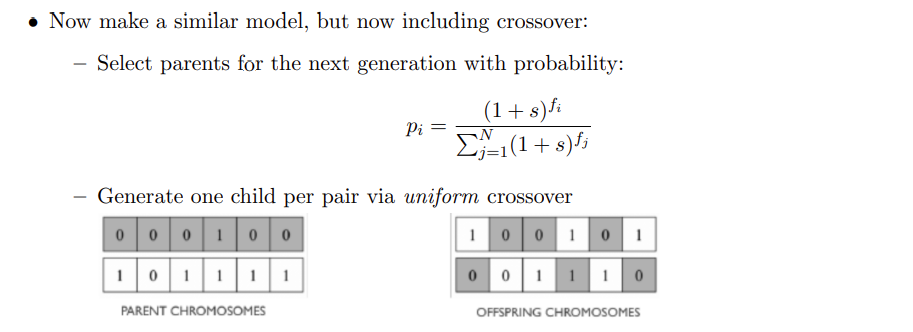

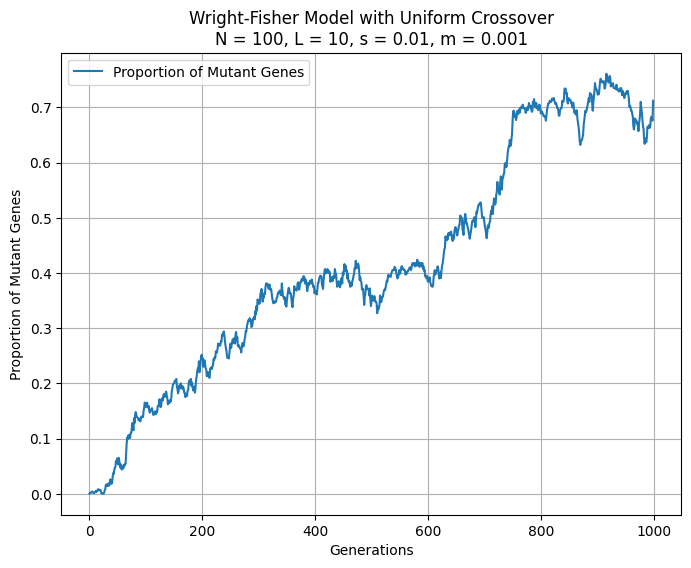

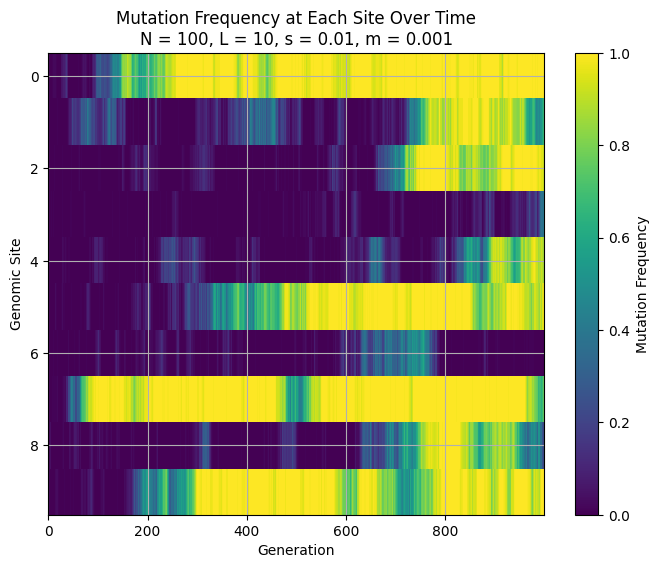

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def wright_fisher_uniform_crossover(N, L, s, m, gens):
    # Initialize the population
    population = np.zeros((N, L), dtype=int)

    # Track mutant proportions over generations
    mutant_props = np.zeros(gens)
    # Track mutation frequency per site
    mutation_freq = np.zeros((gens, L))

    for gen in range(gens):
        # Compute the fitness of each individual
        f = np.sum(population, axis=1)
        fitness = (1 + s) ** f
        # Normalize the fitness values
        selection_probs = fitness / np.sum(fitness)

        # Select parents based on fitness
        parents = np.random.choice(N, size=(N// 2, 2), p=selection_probs)
        new_population = np.zeros((N, L), dtype=int)

        # Apply uniform crossover
        for i, (parent1, parent2) in enumerate(parents):
            mask = np.random.rand(L) < 0.5
            offspring1 = population[parent1] * mask + population[parent2] * (1 - mask)
            offspring2 = population[parent2] * mask + population[parent1] * (1 - mask)

            new_population[2*i] = offspring1
            new_population[2*i + 1] = offspring2

        # Apply mutations to the new population
        mutation_mask = np.random.rand(N, L) < m
        new_population = np.bitwise_xor(new_population, mutation_mask)

        # Update the population and compute the mutant proportion
        population = new_population
        mutant_props[gen] = np.sum(population) / (N * L)
        mutation_freq[gen] = np.mean(population, axis=0)


    return mutant_props, mutation_freq

# Parameters
N = 100     # Population size
L = 10      # Genome length
s = 0.01    # Selection coefficient
m = 0.001   # Mutation probability
generations = 1000  # Number of generations

# Run the Wright-Fisher model with uniform crossover
mutant_props, mutation_freqs = wright_fisher_uniform_crossover(N, L, s, m, generations)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mutant_props, label='Proportion of Mutant Genes')
plt.xlabel('Generations')
plt.ylabel('Proportion of Mutant Genes')
plt.title(f"Wright-Fisher Model with Uniform Crossover\nN = {N}, L = {L}, s = {s}, m = {m}")
plt.legend()
plt.grid()
plt.show()

# Plot the mutation frequency at each site over time
plt.figure(figsize=(8, 6))
plt.imshow(mutation_freqs.T, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Mutation Frequency')
plt.xlabel('Generation')
plt.ylabel('Genomic Site')
plt.title(f"Mutation Frequency at Each Site Over Time\nN = {N}, L = {L}, s = {s}, m = {m}")
plt.grid()
plt.show()


• Plot a graph to compare the sexual model with the asexual model and the Markov model.

• Explore and describe what parameter values make the model deviate more from the Markov
model

Based on the plot below we can make these observations: 
+ The Markov Model (black line) remains near 0, while the Wright-Fisher asexual and sexual models increase over time. 
+ The sexual and asexual models follow similar trends, but the sexual model (orange line) reaches fixation (100%) slightly faster. 
+ The Markov Model deviates significantly from the Wright-Fisher models. 
+ This pannes because the Markov model assumes an infinite population size and deterministic evolution, whereas the Wright-Fisher models introduce random fluctuations (finite N), selective advantage (s), crossover (sexual reproduction) and mutation rates (m,n). 

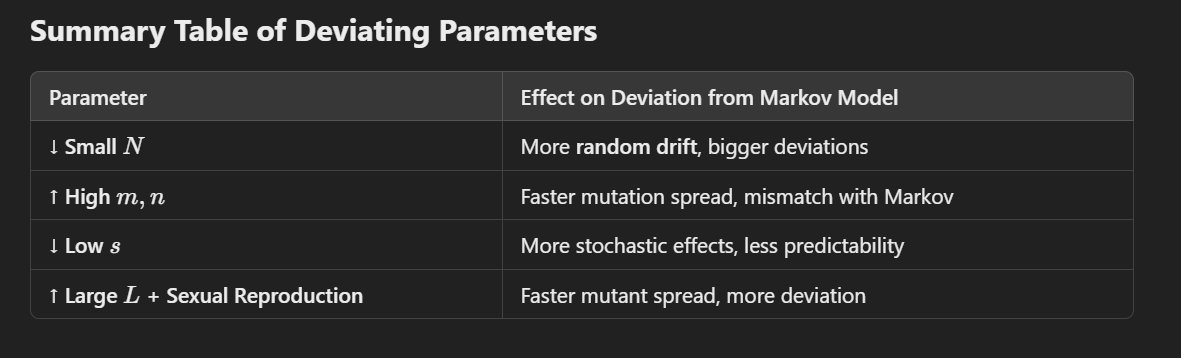


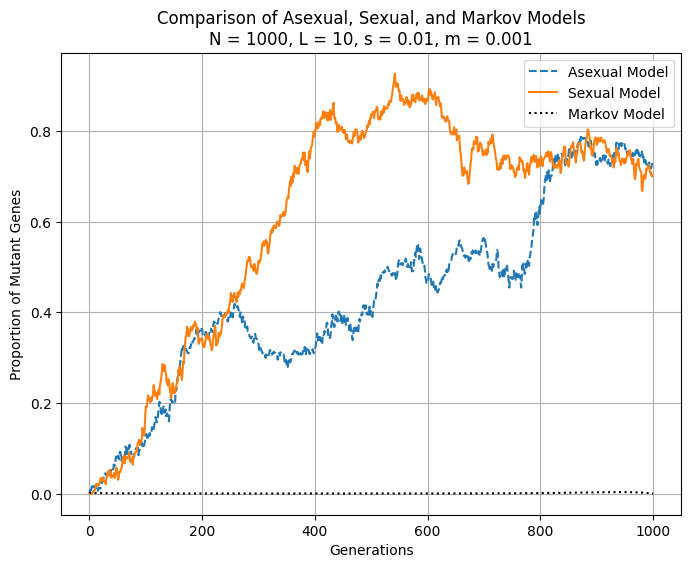

In [116]:
import numpy as np 
import matplotlib.pyplot as plt

# Compute the asexual model (without crossover)
mutant_props_asexual, mutation_freqs_asexual = wrigh_fisher_evolution_genome(N, L, s, m, gens)

# Compute the sexual model (with uniform crossover)
mutant_props_sexual, mutation_freqs_sexual = wright_fisher_uniform_crossover(N, L, s, m, gens)

# Run the Markov Model 
def run_MM(W, x0, gens):
    _, markov_distribution = markov_dist(W, x0, gens)
    #print("Shape of markov_distribution:", markov_distribution.shape)  # Debugging
    return markov_distribution  # Keep this line if shape is correct

# Parameters
N = 1000  # Population size
L = 10    # Genome length
s = 0.01  # Selection coefficient
m = 0.001 # Mutation rate
gens = 1000 # Number of generations

# Compute the transition matrix
W = compute_transition_matrix(N, s, m, m)

# Run the Markov model
markov_props = run_MM(W, x0 = 1, gens = gens)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mutant_props_asexual, label='Asexual Model', linestyle = '--')
plt.plot(mutant_props_sexual, label='Sexual Model', linestyle = '-')
plt.plot(markov_props, label='Markov Model', linestyle = ':', color = 'black')
plt.xlabel('Generations')
plt.ylabel('Proportion of Mutant Genes')
plt.title(f"Comparison of Asexual, Sexual, and Markov Models\nN = {N}, L = {L}, s = {s}, m = {m}")
plt.legend()
plt.grid()
plt.show()

